In [84]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [85]:
from sklearn.datasets import fetch_openml

# Fetch the dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.data
target = boston.target

In [91]:
df=pd.concat([data,target],axis=1)

In [92]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


Data Preproceesing

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.shape

(506, 14)

In [9]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

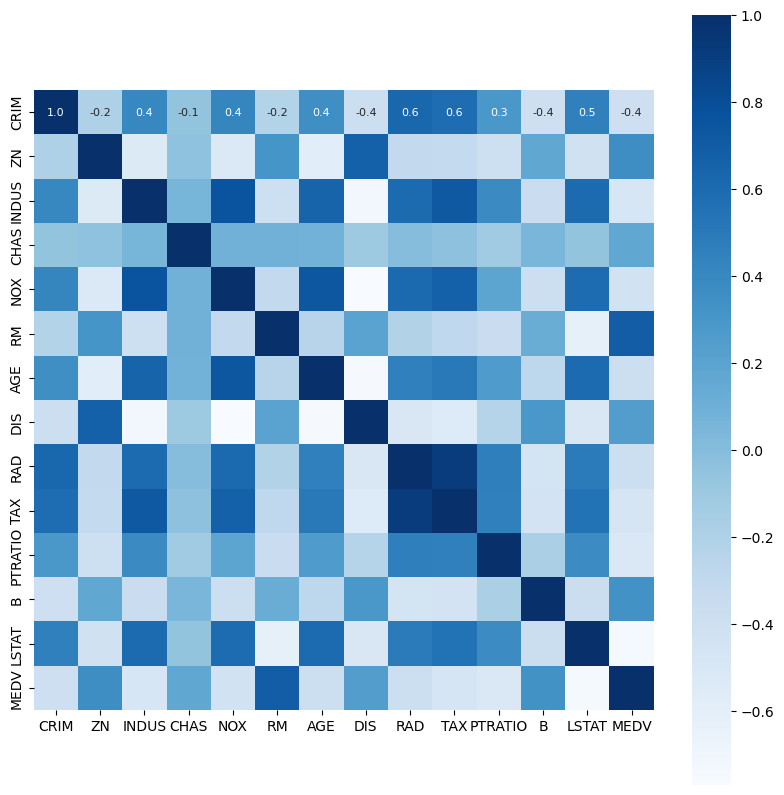

In [10]:
# constructing a heatmap to understand the correlation
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
df['CHAS'] = df['CHAS'].astype('float64')
df['RAD']=df['RAD'].astype('float64')

In [12]:
# split the data
x=df.drop(['MEDV'],axis=1)
y=df['MEDV']

In [13]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Feature selection

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [15]:
model.feature_importances_

array([0.03289868, 0.00563111, 0.04719128, 0.01441455, 0.03878079,
       0.3042191 , 0.02026151, 0.03342831, 0.01590792, 0.04738049,
       0.05030829, 0.01729274, 0.37228524])

In [16]:
col=x.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
feature_imp = pd.Series(model.feature_importances_, index = col)
feature_imp

CRIM       0.032899
ZN         0.005631
INDUS      0.047191
CHAS       0.014415
NOX        0.038781
RM         0.304219
AGE        0.020262
DIS        0.033428
RAD        0.015908
TAX        0.047380
PTRATIO    0.050308
B          0.017293
LSTAT      0.372285
dtype: float64

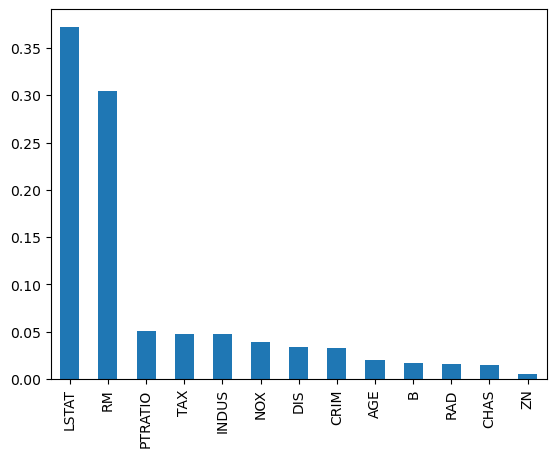

In [18]:
feature_imp.nlargest(13).plot(kind = "bar")
plt.show()

In [19]:
#from this LSTAT is highly corealeted to output while ZN is not releted to output so we can drop ZN,CHAS,B, AGE but we keep all as our data is not so long 
# if their is more column then absoutely we can drop this column to avoid model complexity

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2,random_state=42)

In [21]:
x_train.shape,x_test.shape

((404, 13), (102, 13))

LINEAR REGRESSION

In [22]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = LR.predict(x_test)

In [24]:
x_pred=LR.predict(x_train)

In [25]:
LR.score(x_test,y_test)

0.6687594935356329

In [26]:
LR.score(x_train,y_train)

0.7508856358979673

In [27]:
from sklearn.metrics import mean_squared_error,r2_score

In [28]:
score_l=r2_score(y_test,y_pred)

In [29]:
score_l1=r2_score(x_pred,y_train)

In [30]:
print("R^2 score for LR",r2_score(y_test,y_pred))

R^2 score for LR 0.6687594935356329


Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
DC=DecisionTreeRegressor(max_depth=5)
DC.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [32]:
y_pred1=DC.predict(x_test)

In [33]:
x_pred1=DC.predict(x_train)

In [34]:
score_D=r2_score(y_test,y_pred1)

In [35]:
score_D1=r2_score(y_train,x_pred1)

In [36]:
print("R^2 score for DT",r2_score(y_test,y_pred1))

R^2 score for DT 0.885137272531848


In [37]:
# this is under fitiing condition
# so we use grid-search cv for overcome overfitting 

KNeigbhor Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn=  KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [39]:
y_pred2=knn.predict(x_test)

In [40]:
x_pred2=knn.predict(x_train)

In [41]:
score_k=r2_score(y_test,y_pred2)

In [42]:
score_k1=r2_score(x_pred2,y_train)

In [43]:
print("R^2 score for knn",r2_score(y_test,y_pred2))

R^2 score for knn 0.6473640882039258


 BaggingRegressor

In [44]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1) # by default here base model is Decision tree
bag_regressor.fit(x_train, y_train)

BaggingRegressor(random_state=1)

In [45]:
y_pred3=bag_regressor.predict(x_test)

In [46]:
x_pred3=bag_regressor.predict(x_train)

In [47]:
score_b=r2_score(y_test,y_pred3)

In [48]:
score_b1=r2_score(y_train,x_pred3)

In [58]:
y_pred3 = bag_regressor.predict(x_test)

print('Training Coefficient of R^2 : ',bag_regressor.score(x_train, y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(x_test, y_test))

Training Coefficient of R^2 :  0.9724450211875771
Test Coefficient of R^2 : 0.838


In [59]:
print("R^2 score for DT",r2_score(y_test,y_pred3))

R^2 score for DT 0.837526624954644


In [60]:
# Use of grid search cv

In [61]:
from sklearn.model_selection import GridSearchCV
params = {'estimator': [None, LinearRegression(), KNeighborsRegressor()],# by default means is decision tree regressor
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(x_train, y_train)
y_pred4=bagging_regressor_grid.predict(x_test)
x_pred4=bagging_regressor_grid.predict(x_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [62]:
print("R^2 score for DT",r2_score(y_test,y_pred4))

R^2 score for DT 0.8691917348651055


Xgboost Regressor

In [63]:
from xgboost import XGBRegressor

In [64]:
xgb= XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
x_pred5=xgb.predict(x_train)

In [66]:
y_pred5=xgb.predict(x_test)

In [67]:
score_x=r2_score(y_test,y_pred5)
score_x

0.9057837838492537

In [68]:
print("R^2 score for XGboost",r2_score(y_test,y_pred5))

R^2 score for XGboost 0.9057837838492537


In [69]:
score_x1=r2_score(x_pred5,y_train)
score_x1

0.9999969820466211

In [70]:
# now you can see XGboost is best algo for this model so we use XGboost for prediction

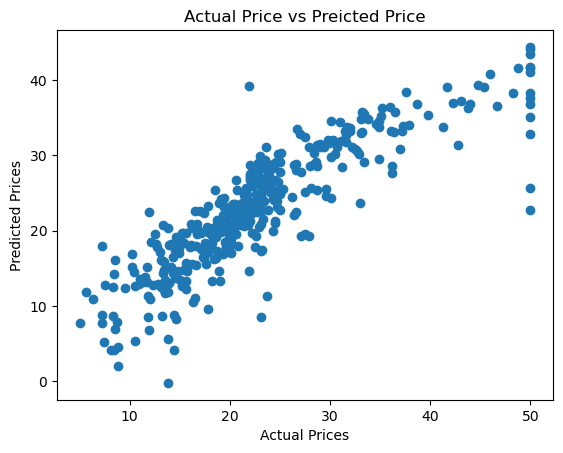

In [71]:
plt.scatter(y_train, x_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [72]:
data = {
    'model': ['LINEAR REGRESSION', 'Decision Tree Regression', 'KNeigbhor Regressor', 'Bagging Regressoer','Xgboost Regressor'],
    'r2_score of test_data': [score_l, score_D, score_k, score_b,score_x]
}

df = pd.DataFrame(data)

In [73]:
df

,model,r2_score of test_data
0,LINEAR REGRESSION,0.668759
1,Decision Tree Regression,0.885137
2,KNeigbhor Regressor,0.647364
3,Bagging Regressoer,0.837527
4,Xgboost Regressor,0.905784


In [74]:
# from this  you can see Xgboost is best for this model

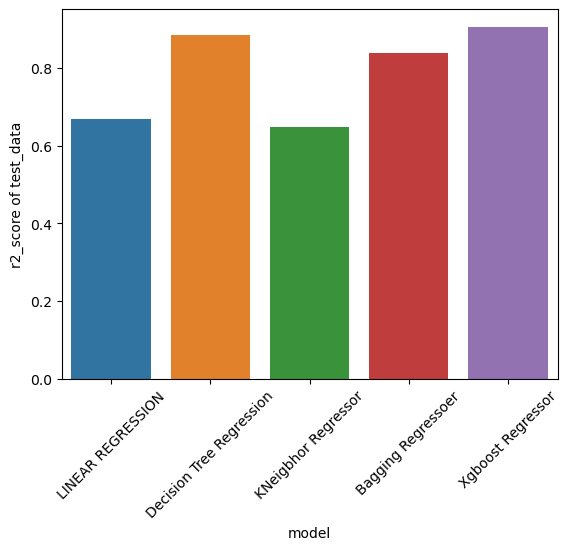

In [75]:
# Create the bar plot
sns.barplot(x='model', y='r2_score of test_data', data=df)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [76]:
# from this graph it is clear that Xgboost is best for this model

MODEL FOR PREDICTION

In [77]:
model =XGBRegressor()

In [78]:
model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
input_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])

# Make the prediction
prediction = model.predict(input_data)

# Print the prediction
print(prediction)

[23.997942]


In [94]:
input_data = np.array([[0.02729	,0.0,7.07,0	,0.469,7.185,	61.1,4.9671,2,242.0,17.8,392.83	,4.03]])

# Make the prediction
prediction = model.predict(input_data)

# Print the prediction
print(prediction)

[34.714954]
